# Convolutional Neural Network Architecture
![Untitled%20Diagram.png](attachment:Untitled%20Diagram.png)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

data=np.load('/content/drive/MyDrive/Covid-19 prediction using X-Ray images/data.npy')
target=np.load('/content/drive/MyDrive/Covid-19 prediction using X-Ray images/target.npy')

In [3]:
from keras.callbacks import ModelCheckpoint

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
from sklearn.model_selection import train_test_split

In [6]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto',save_weights_only=True)
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
50/50 [==============================] - 14s 31ms/step - loss: 0.3137 - accuracy: 0.8605 - val_loss: 0.2563 - val_accuracy: 0.9266
Epoch 2/20
50/50 [==============================] - 1s 22ms/step - loss: 0.1098 - accuracy: 0.9659 - val_loss: 0.1566 - val_accuracy: 0.9548
Epoch 3/20
50/50 [==============================] - 1s 22ms/step - loss: 0.1313 - accuracy: 0.9596 - val_loss: 0.1427 - val_accuracy: 0.9548
Epoch 4/20
50/50 [==============================] - 1s 21ms/step - loss: 0.0762 - accuracy: 0.9722 - val_loss: 0.1059 - val_accuracy: 0.9661
Epoch 5/20
50/50 [==============================] - 1s 23ms/step - loss: 0.0583 - accuracy: 0.9798 - val_loss: 0.0972 - val_accuracy: 0.9605
Epoch 6/20
50/50 [==============================] - 1s 21ms/step - loss: 0.0468 - accuracy: 0.9830 - val_loss: 0.0855 - val_accuracy: 0.9887
Epoch 7/20
50/50 [==============================] - 1s 19ms/step - loss: 0.0301 - accuracy: 0.9912 - val_loss: 0.1622 - val_accuracy: 0.9661
Epoch 8/20
5

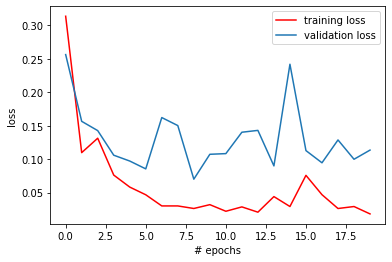

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

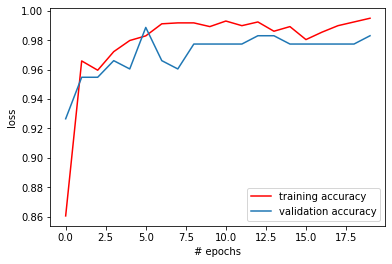

In [8]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(test_data,test_target))

7/7 [==============================] - 0s 16ms/step - loss: 0.1961 - accuracy: 0.9745
[0.19610442221164703, 0.9744898080825806]


In [10]:
model.save("Detection_Covid_19.h5")

In [13]:
from keras.models import load_model

In [14]:
model = load_model("Detection_Covid_19.h5")